In [ ]:
import tensorflow_datasets as tfds
from tensorflow import keras
import tensorflow as tf
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset , info = tfds.load("cats_vs_dogs" , with_info = True , as_supervised = True)

In [ ]:
train_dataset= dataset['train']

In [ ]:
images = []
labels = []
count = 0
for image,label in train_dataset:
  count+=1
  images.append(image)
  labels.append(label)
  if count == 10:
    break

In [ ]:
labels = ["dog" if i== 1  else "cat" for i in labels]
print(labels)

['dog', 'dog', 'dog', 'cat', 'dog', 'dog', 'cat', 'cat', 'dog', 'dog']


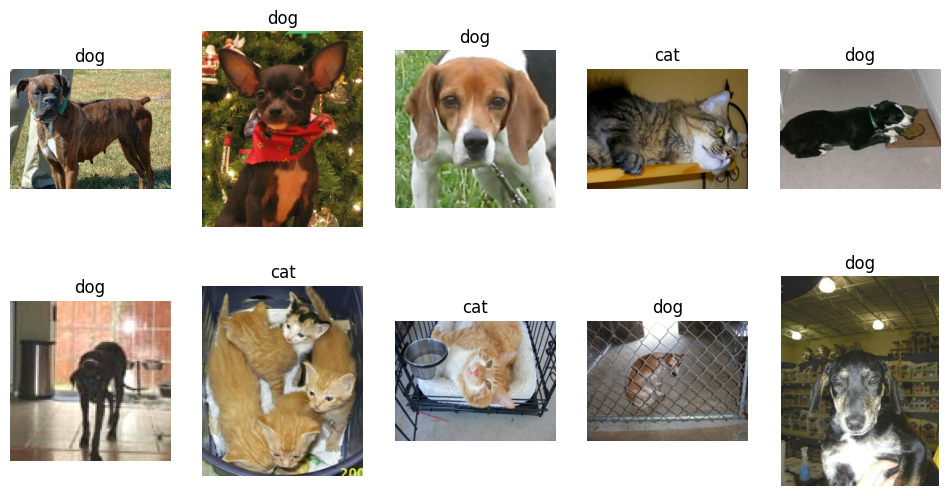

In [ ]:
plt.figure(figsize=(12,6))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(images[i])
  plt.title(labels[i])
  plt.axis("off")
plt.show()

In [ ]:
def preprocess(image , label):
  image = tf.image.resize(image,(224,224))
  image = image/255.0
  label = tf.one_hot(label , depth = 2)

  return image, label


In [ ]:
train_dataset = train_dataset.map(preprocess)

In [ ]:
for image , label in train_dataset.take(1):
  print(image.shape , label.shape)
  break

(224, 224, 3) (2,)


In [ ]:
print(len(train_dataset))

23262


In [ ]:
train_dataset = train_dataset.take(18000)
test_dataset = train_dataset.skip(18000).take(5000)

In [ ]:
train_dataset = train_dataset.batch(32)
test_dataset = test_dataset.batch(32)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(input_shape = (224,224,3) , kernel_size = (3,3) , activation = "relu" , padding = "same" , filters = 32),
    keras.layers.Conv2D(kernel_size = (3,3) , activation = "relu" , padding = "same" , filters = 32),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D((2,2)), # 112

    keras.layers.Conv2D(kernel_size = (3,3) , activation = "relu" , padding = "same" , filters = 64),
    keras.layers.Conv2D(kernel_size = (3,3) , activation = "relu" , padding = "same" , filters = 64),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D((2,2)), #56

    keras.layers.Conv2D(kernel_size = (3,3) , activation = "relu" , padding = "same" , filters = 128),
    keras.layers.Conv2D(kernel_size = (3,3) , activation = "relu" , padding = "same" , filters = 128),
    keras.layers.Conv2D(kernel_size = (3,3) , activation = "relu" , padding = "same" , filters = 128),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D((2,2)), # 28

    keras.layers.Conv2D(kernel_size = (3,3) , activation = "relu" , padding = "same" , filters = 256),
    keras.layers.Conv2D(kernel_size = (3,3) , activation = "relu" , padding = "same" , filters = 256),
    keras.layers.Conv2D(kernel_size = (3,3) , activation = "relu" , padding = "same" , filters = 256),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D((2,2)), #14

    keras.layers.Conv2D(kernel_size = (3,3) , activation = "relu" , padding = "same" , filters = 512),
    keras.layers.Conv2D(kernel_size = (3,3) , activation = "relu" , padding = "same" , filters = 512),
    keras.layers.Conv2D(kernel_size = (3,3) , activation = "relu" , padding = "same" , filters = 512),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D((2,2)), #7

    keras.layers.GlobalAveragePooling2D(),

    keras.layers.Dense(128 , activation = "relu"),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(2 , activation = "softmax")

])

In [ ]:
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)                   │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 224, 224, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 112, 112, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 56, 56, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 56, 56, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 28, 28, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 28, 28, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 28, 28, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 14, 14, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 7,879,586 (30.06 MB)

 Trainable params: 7,877,602 (30.05 MB)

 Non-trainable params: 1,984 (7.75 KB)

None


In [ ]:
model.compile(loss = keras.losses.CategoricalCrossentropy() , optimizer = keras.optimizers.Adam(learning_rate = 0.001) , metrics = ["accuracy"])

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model.save('/content/drive/MyDrive/MyModels/cat_and_dog.h5' , save_format = 'h5')

In [ ]:
early_stopping = EarlyStopping(monitor = "loss" , patience = 5 , restore_best_weights = True)

In [ ]:
hist = model.fit(train_dataset , epochs = 10, verbose = 2 ,callbacks = [early_stopping] , validation_data = (test_dataset))

Epoch 1/10
563/563 - 177s - 314ms/step - accuracy: 0.5613 - loss: 0.6955
Epoch 2/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


563/563 - 142s - 251ms/step - accuracy: 0.5931 - loss: 0.6672
Epoch 3/10
563/563 - 142s - 252ms/step - accuracy: 0.6411 - loss: 0.6379
Epoch 4/10
563/563 - 140s - 248ms/step - accuracy: 0.7168 - loss: 0.5594
Epoch 5/10
563/563 - 140s - 249ms/step - accuracy: 0.7720 - loss: 0.4820
Epoch 6/10
563/563 - 140s - 249ms/step - accuracy: 0.8181 - loss: 0.4092
Epoch 7/10
563/563 - 142s - 252ms/step - accuracy: 0.8486 - loss: 0.3457
Epoch 8/10
563/563 - 140s - 249ms/step - accuracy: 0.8767 - loss: 0.2911
Epoch 9/10
563/563 - 139s - 247ms/step - accuracy: 0.8984 - loss: 0.2458
Epoch 10/10
563/563 - 140s - 248ms/step - accuracy: 0.9160 - loss: 0.2075


(-0.45, 9.45, 0.18308118283748626, 0.7198921710252761)

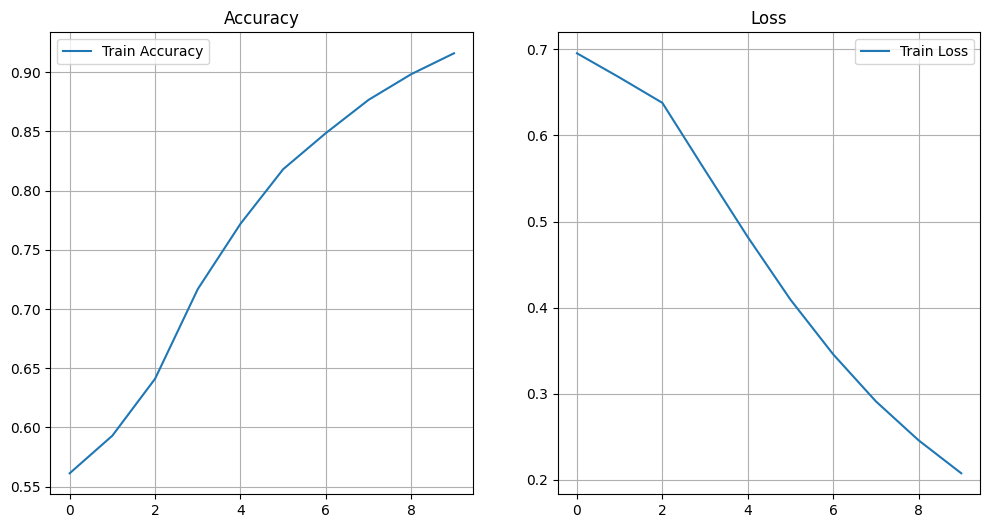

In [ ]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.plot(hist.history['accuracy'] , label = "Train Accuracy")
plt.title("Accuracy")
plt.grid()
plt.legend()
plt.axis()

plt.subplot(1,2,2)
plt.plot(hist.history['loss'] , label = "Train Loss")
plt.title("Loss")
plt.grid()
plt.legend()
plt.axis()

In [ ]:
model.evaluate(train_dataset)

563/563 ━━━━━━━━━━━━━━━━━━━━ 48s 75ms/step - accuracy: 0.8287 - loss: 0.3967


[0.3865499496459961, 0.8338888883590698]

In [ ]:
dataset2 , info = tfds.load("cats_vs_dogs" , with_info = True , as_supervised = True)

In [ ]:
main_dataset = dataset2['train']

In [ ]:
main_dataset = main_dataset.map(preprocess)

NameError: name 'main_dataset' is not defined

In [ ]:
test_dataset = main_dataset.skip(18000)

In [ ]:
test_dataset = test_dataset.batch(32)

In [ ]:
model.evaluate(test_dataset)

In [ ]:
for image, label in test_dataset.take(1):
  print(f"Image shape {image.shape} , label shape {label.shape}")
  break

In [ ]:
predictions = []
labels = []
images = []
count = 0

for image_batch, label_batch in test_dataset.take(1):
    preds = model.predict(image_batch)
    images.append(image_batch)
    predictions.append(preds)
    labels.append(label_batch)
    count += 1
    if count == 25:
        break

labels = [np.argmax(label_batch, axis=-1) for label_batch in labels]
labels = ["dog" if label == 1 else "cat" for label in labels[0]]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


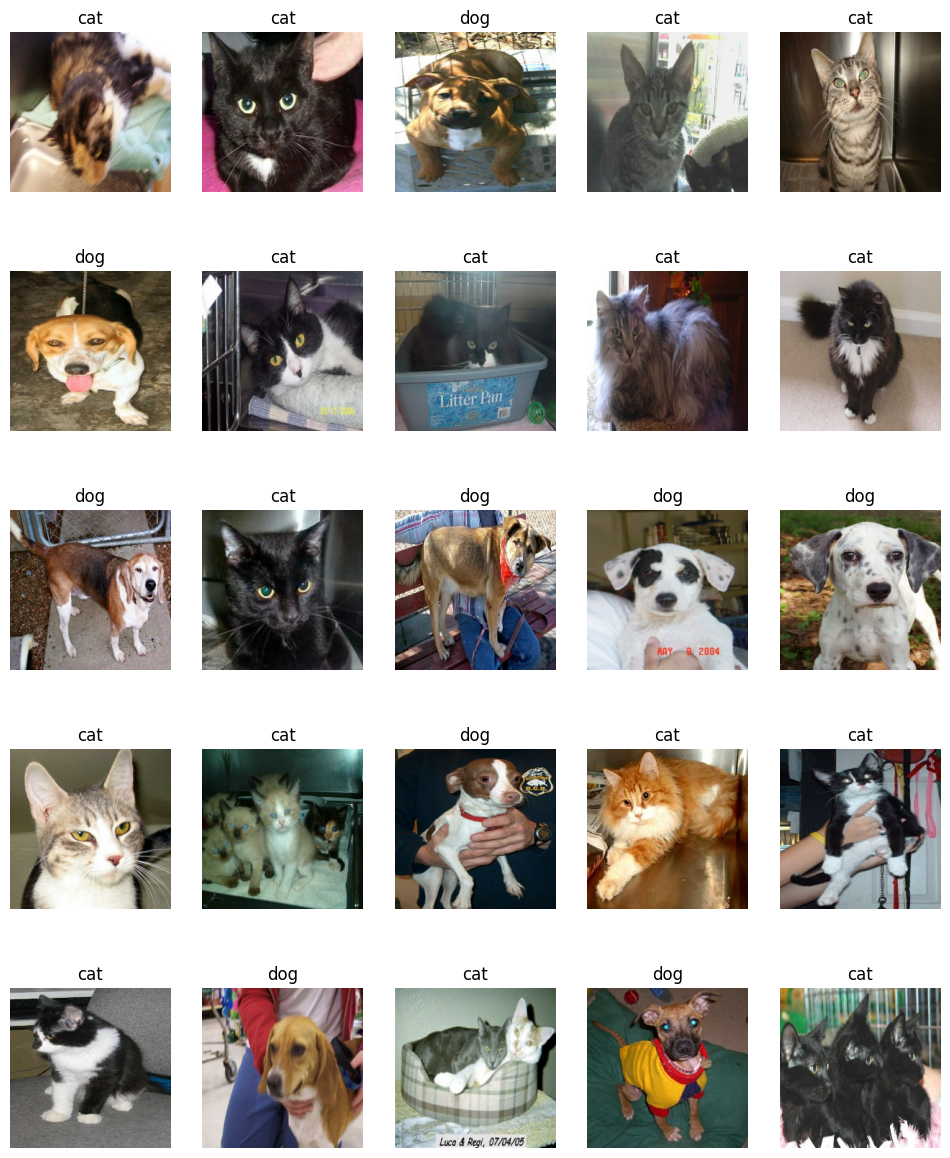

In [ ]:
plt.figure(figsize=(12, 15))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    img = images[0][i].numpy().reshape(224, 224, 3)
    plt.imshow(img)
    plt.title(labels[i])
    plt.axis("off")
plt.show()